In [1]:
import tensorflow

In [2]:
print(tensorflow.__version__)

2.0.0


In [3]:
# 注释：安装tensorflow2.0，import tensorflow.keras as keras，可以使用tensorflow内集成的keras模块，神经网络编写接口友善

In [4]:
import tensorflow.keras as keras

In [5]:
from keras.datasets import mnist

Using TensorFlow backend.


In [6]:
from keras.datasets import mnist

In [7]:
#引入Keras自带手写数字数据集，且自动按照七三开比例划分训练数据集与测试数据集，初次运行，下载时间在5分钟左右

In [8]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


In [9]:
#引入python-matlab接口，实现画图功能，看看图像和标签的模样

Text(0.5, 1.0, 'Class 5')

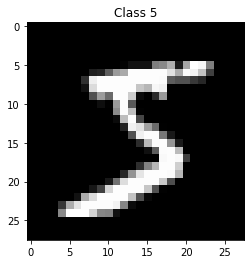

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [11]:
#图像reshape到28*28*1灰度图（宽度、高度、像素通道）

In [12]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [13]:
#图像像素是0-255（2^8)，在实际处理中，为了便于梯度相关的优化算法，需要对图像像素做归一化处理

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [15]:
#0-9的数字一共十类，对标签进行独热编码

In [16]:
#引入numpy库，python矩阵运算相关的library

In [17]:
import numpy as np

In [18]:
from keras.utils import np_utils

In [19]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [21]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU

In [22]:
# CNN三步走
# 1. 卷积层
# 2. 非线性激活函数
# 3. 池化层
# 重复堆叠操作

# 4.全连接层
#为了正则化，可以加入Dropout
#为了防止分布漂移，可以加入BathcNormalization
#这里先是使用32个感受野为3*3的卷积滤波器，再加入Relu激活函数，BatcchNormalization为正则化的操作，再卷积+激活函数+最大池化，在64个滤波器的卷积核操作上重复

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization())
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

model.add(BatchNormalization())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [23]:
#model.summary()看结构

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)       

In [26]:
from keras.optimizers import Adam

In [27]:
#Adam 作为优化器，更多其介绍，参考Adam论文https://arxiv.org/abs/1412.6980

In [28]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [29]:
#ImageDataGenerator引入Keras图像处理接口，参考https://keras.io/zh/preprocessing/image/

In [30]:
from keras.preprocessing.image import ImageDataGenerator

In [31]:
#训练数据增强应对潜在的过拟合风险，测试数据不增强

In [36]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [39]:
train_generator=gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [40]:
#训练5个epoch，看效果

In [ ]:
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5


In [ ]:
#在测试集上看效果

In [ ]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

In [ ]:
#请同学们配置GPU运行本程序